## Twitter Sentiment Analysis About Coronavirus

In [2]:
## Import libraries

from textblob import TextBlob 
import tweepy
import matplotlib.pyplot as plt ## For visualization
import time

#### Connecting Twitter API for analysis

In [3]:
consumer_key="your_consumer_key"
consumer_secrete="your_consumer_key_secrete"
access_token="your_access_token"
access_token_secrete="your_access_token_secrete"
bearer_token="your_bearer_token"

# Connecting to Tweeter 
client = tweepy.Client(
    bearer_token=bearer_token,
    consumer_key=consumer_key,
    consumer_secret=consumer_secrete,
    access_token=access_token,
    access_token_secret=access_token_secrete,
     # Automatically wait for rate limits to expire
    wait_on_rate_limit=True  
)

In [4]:
search_term ="Coronavirus"
no_of_tweets = 20
# tweets=tweepy.Cursor(api.search_tweets, q = search_term).items(no_of_tweets)
try:
    tweets = client.search_recent_tweets(query=search_term, max_results=no_of_tweets)
except tweepy.TooManyRequests as e:
    # Print the error message
    print(f"Rate limit exceeded: {e}")
    # Wait for the rate limit to reset (usually 15 minutes)
    time.sleep(60 * 15)
    # Retry the request
    tweets = client.search_recent_tweets(query=search_term, max_results=no_of_tweets)
    

In [5]:
sentiments = []
for tweet in tweets.data:
    text = tweet.text
    analysis = TextBlob(text)
    print(analysis.sentiment)
    sentiment = analysis.sentiment.polarity  
    sentiments.append(sentiment)

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.2)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.2)
Sentiment(polarity=-0.625, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.2)
Sentiment(polarity=0.0, subjectivity=0.2)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.6, subjectivity=0.9)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.2)
Sentiment(polarity=0.1, subjectivity=0.5916666666666667)
Sentiment(polarity=0.26666666666666666, subjectivity=0.5416666666666666)
Sentiment(polarity=0.0, subjectivity=0.2)
Sentiment(polarity=0.0, subjectivity=0.2)
Sentiment(polarity=-0.13373015873015873, subjectivity=0.3119047619047619)
Sentiment(polarity=0.0, subjectivity=0.2)
Sentiment(polarity=0.375, subjectivity=0.41666666666666663)
Sentiment(polarity=0.0, subjectivity=0.06666666666666667)
Sentiment(polarity=0.0, subjectivity=0.2)


### Analysis of Tweets

In [6]:
# Categorize sentiments
positive_tweets = sum(1 for sentiment in sentiments if sentiment > 0)
negative_tweets = sum(1 for sentiment in sentiments if sentiment < 0)
neutral_tweets = sum(1 for sentiment in sentiments if sentiment == 0)

print(f"Positive Tweets: {positive_tweets}")
print(f"Negative Tweets: {negative_tweets}")
print(f"Neutral Tweets: {neutral_tweets}")

print("The Reaction of the people on " + search_term + " By analysing " + str(no_of_tweets) + " Tweets" )
if(positive_tweets > negative_tweets):
    print("Positive")
elif(positive_tweets < negative_tweets):
    print("Negative")
else:
    print("Neutral")  
    

Positive Tweets: 4
Negative Tweets: 2
Neutral Tweets: 14
The Reaction of the people on Coronavirus By analysing 20 Tweets
Positive


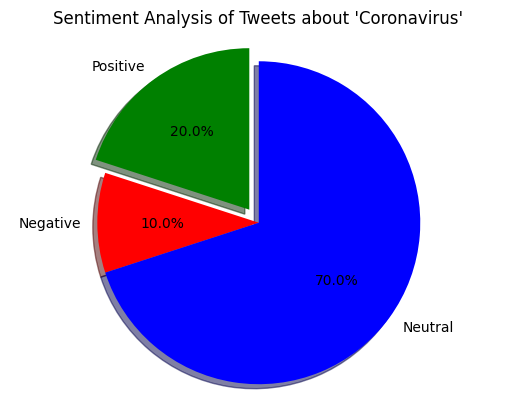

In [7]:
# Create a pie chart
labels = ['Positive', 'Negative', 'Neutral']
sizes = [positive_tweets, negative_tweets, neutral_tweets]
colors = ['green', 'red', 'blue']
explode = (0.1, 0, 0)  

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal') 
plt.title(f"Sentiment Analysis of Tweets about '{search_term}'")
plt.show()